<a href="https://colab.research.google.com/github/chaitsugale/Stock-Market-Prediction-The-Spark-Foundation-/blob/main/Stock_Market_Prediction_Using_Numerical_and_Textual_Analysis(The_Spark_Foundation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction Using Numerical and Textual Analysis

Objective: Create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines

Here We are analyzing and predicting the stocks of BOMBAY STOCK EXCHANGE i.e. SENSEX (S&F BSE SENSEX) 

SENSEX or BOMBAY STOCK EXCHANGE is the oldest stock exchange in ASIA establishing in 1875.

## Step 1: Loading the Package

> Loading all the important packages for analyzing and predicting alonng with plotting graph



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import altair as alt  #Altair is a declarative statistical visualization library for Python

import statsmodels.api as sm 

from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.stattools import adfuller

In [2]:
import warnings
warnings.filterwarnings('ignore')

Here We will extracting the data of **Bombay Stock Exchange** from yahoo finance through **Python API**

So we are installing the PYPI yfinance

In [3]:
# installing pypi package for yahoo finance


!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 109.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 299.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 294.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 241.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 282.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 301.6 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup

In [4]:
import yfinance as yf

In [5]:
bse_data = yf.download('^BSESN',start = '2001-01-01',end = '2022-03-31')
print(bse_data)

[*********************100%***********************]  1 of 1 completed
                    Open          High           Low         Close  \
Date                                                                 
2001-01-02   3953.219971   4028.570068   3929.370117   4018.879883   
2001-01-03   3977.580078   4067.659912   3977.580078   4060.020020   
2001-01-04   4180.970215   4180.970215   4109.549805   4115.370117   
2001-01-05   4116.339844   4195.009766   4115.350098   4183.729980   
2001-01-08   4164.759766   4206.720215   4101.529785   4120.430176   
...                  ...           ...           ...           ...   
2022-03-24  57190.050781  57827.988281  57138.511719  57595.679688   
2022-03-25  57801.718750  57845.371094  57100.238281  57362.199219   
2022-03-28  57472.718750  57638.339844  56825.089844  57593.488281   
2022-03-29  57814.761719  58001.531250  57639.351562  57943.648438   
2022-03-30  58362.851562  58727.781250  58176.000000  58683.988281   

               Adj C

In [6]:
bse_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
bse_data.reset_index(inplace=True)

In [8]:
bse_data.head()

Date         Open         High          Low        Close    Adj Close  \
0 2001-01-02  3953.219971  4028.570068  3929.370117  4018.879883  4018.879883   
1 2001-01-03  3977.580078  4067.659912  3977.580078  4060.020020  4060.020020   
2 2001-01-04  4180.970215  4180.970215  4109.549805  4115.370117  4115.370117   
3 2001-01-05  4116.339844  4195.009766  4115.350098  4183.729980  4183.729980   
4 2001-01-08  4164.759766  4206.720215  4101.529785  4120.430176  4120.430176   

   Volume  
0       0  
1       0  
2       0  
3       0  
4       0

In [9]:
bse_data.tail()

Date          Open          High           Low         Close  \
5229 2022-03-24  57190.050781  57827.988281  57138.511719  57595.679688   
5230 2022-03-25  57801.718750  57845.371094  57100.238281  57362.199219   
5231 2022-03-28  57472.718750  57638.339844  56825.089844  57593.488281   
5232 2022-03-29  57814.761719  58001.531250  57639.351562  57943.648438   
5233 2022-03-30  58362.851562  58727.781250  58176.000000  58683.988281   

         Adj Close  Volume  
5229  57595.679688   51400  
5230  57362.199219    6900  
5231  57593.488281    6300  
5232  57943.648438   12100  
5233  58683.988281    6300

In [10]:
bse_data.shape

(5234, 7)

In [11]:
bse_data.size#bse_data.to_csv('bse.csv')

36638

In [12]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5234 non-null   datetime64[ns]
 1   Open       5234 non-null   float64       
 2   High       5234 non-null   float64       
 3   Low        5234 non-null   float64       
 4   Close      5234 non-null   float64       
 5   Adj Close  5234 non-null   float64       
 6   Volume     5234 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 286.4 KB


In [13]:
bse_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
bse_data['Date'] = pd.to_datetime(bse_data['Date'])

In [15]:
bse_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5234 non-null   datetime64[ns]
 1   Open       5234 non-null   float64       
 2   High       5234 non-null   float64       
 3   Low        5234 non-null   float64       
 4   Close      5234 non-null   float64       
 5   Adj Close  5234 non-null   float64       
 6   Volume     5234 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 286.4 KB


In [16]:
def bse_stock_weekly_moving_avg(weeks,df):
  close_data = pd.DataFrame({'date': df['Date'] , 'close': df['Close']})
  close_data.set_index('date',inplace=True)
  num = weeks * 5
  close_data['moving_avg'] = close_data['close'].rolling(window = num).mean().shift()
  return close_data.dropna()

In [17]:
bse_stock_weekly_moving_avg(4,bse_data).head()

close   moving_avg
date                                
2001-01-31  4326.720215  4153.535486
2001-02-01  4286.109863  4168.927502
2001-02-02  4352.259766  4180.231995
2001-02-05  4370.470215  4192.076477
2001-02-06  4375.290039  4201.413489

In [18]:
bse_stock_weekly_moving_avg(4,bse_data).plot()

<AxesSubplot:xlabel='date'>

Text(0, 0.5, 'Close')

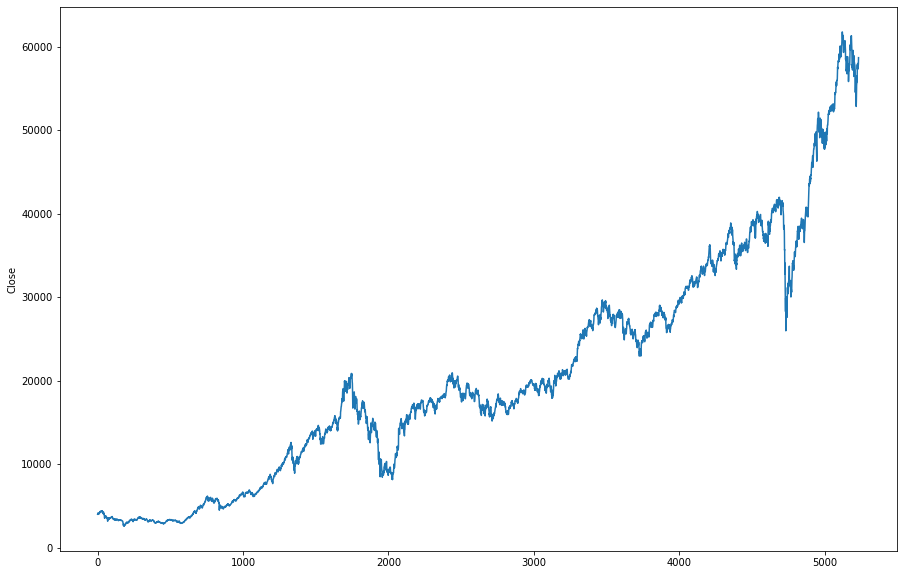

In [19]:
plt.figure(figsize=(15, 10))
bse_data['Close'].plot()
plt.ylabel('Close')

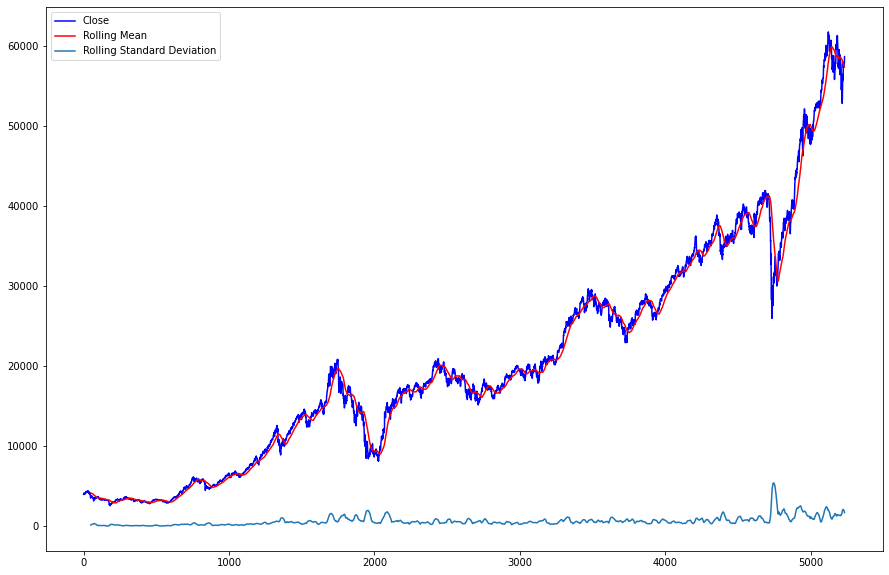

In [20]:
#Plotting moving average for window 50
bse_close = bse_data['Close']
ma_50 = bse_close.rolling(window = 50).mean()
std_50 = bse_close.rolling(window = 50).std()

plt.figure(figsize=(15, 10))
bse_data['Close'].plot(color = 'b', label = 'Close')
ma_50.plot(color = 'r', label = 'Rolling Mean')
std_50.plot(label = 'Rolling Standard Deviation')
plt.legend()

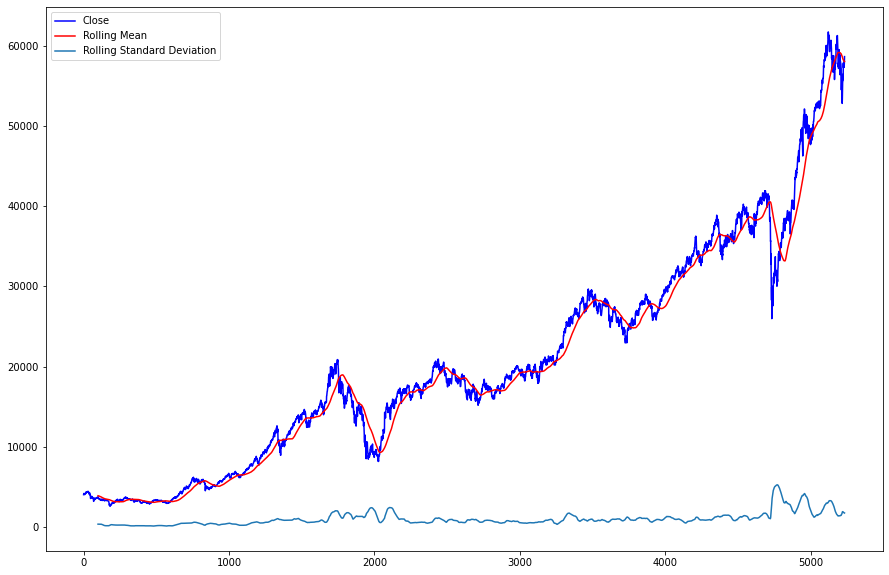

In [21]:
#Plotting moving average for window 100
bse_close = bse_data['Close']
ma_100 = bse_close.rolling(window = 100).mean()
std_100 = bse_close.rolling(window = 100).std()

plt.figure(figsize=(15, 10))
bse_data['Close'].plot(color = 'b', label = 'Close')
ma_100.plot(color = 'r', label = 'Rolling Mean')
std_100.plot(label = 'Rolling Standard Deviation')
plt.legend()

In [22]:
# Plotting return

bse_returns =  bse_close/bse_close.shift(1) - 1

plt.figure(figsize=(15, 10))

bse_returns.plot(label='Return' , color = 'green')

plt.title('Returns')

Text(0.5, 1.0, 'Returns')

In [23]:
#bse_train = bse_data[:3000]
#bse_test = bse_data[3000:]

bse_train = bse_data[:4000]
bse_test = bse_data[4000:]

In [24]:
def test_stationary(timeseries):
  rolmean = timeseries.rolling(30).mean()
  rolstd = timeseries.rolling(30).std()

  plt.figure(figsize = (15,10))
  plt.plot(timeseries,color = 'y',label = 'original',linewidth=5.0)
  plt.plot(rolmean,color='r',label = 'rolling mean')
  plt.plot(rolstd,color = 'b',label = 'rolling standard')
  plt.xlabel('Date')
  plt.legend()
  plt.title('Rolling Mean and standard Deviation',fontsize = 25)
  #plt.title(timeseries)
  plt.show(block = False)

  print('**************Result of Dickey Fuller Test***************')
  result = adfuller(timeseries,autolag = 'AIC')
  print(result)
  labels = ['ADF Test Statistics' , 'p-value' ,'#Lags Used','Number of Observation Used','Critical Value']
  for value,label in zip(result,labels):
    print(label+ ' : ' +str(value))
  if result[1] <= 0.05:
  #if result[0] <= result[4]["5%"]:
    print('Reject the Null Hypothesis (Ho) test and the Time series is Stationary')
  else:
    print('Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary')

In [25]:
print('************ BSE TRAIN CLOSE DATA *******************')
test_stationary(bse_train['Close'])

************ BSE TRAIN CLOSE DATA *******************


**************Result of Dickey Fuller Test***************
(-0.2308272646555419, 0.9347459394256755, 5, 3994, {'1%': -3.431988334447595, '5%': -2.8622639265398497, '10%': -2.567155353857025}, 53487.905052680995)
ADF Test Statistics : -0.2308272646555419
p-value : 0.9347459394256755
#Lags Used : 5
Number of Observation Used : 3994
Critical Value : {'1%': -3.431988334447595, '5%': -2.8622639265398497, '10%': -2.567155353857025}
Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary


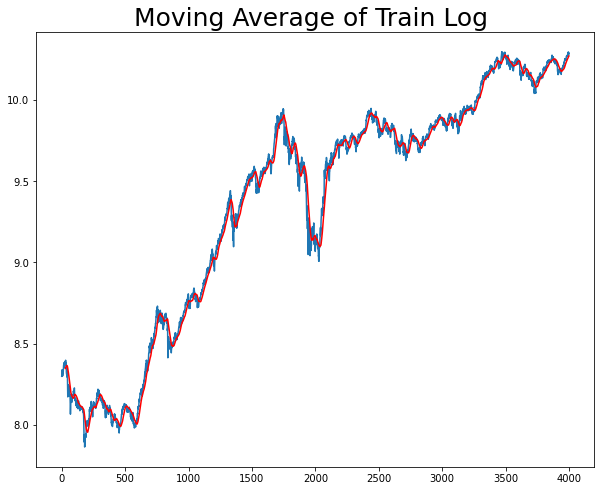

In [26]:
bse_train_log = np.log(bse_train['Close'])
bse_test_log = np.log(bse_test['Close'])

moving_avg_train = bse_train_log.rolling(30).mean()

plt.figure(figsize = (10,8))
plt.title('Moving Average of Train Log ',fontsize = 25)
plt.plot(bse_train_log)
plt.plot(moving_avg_train,color = 'red')

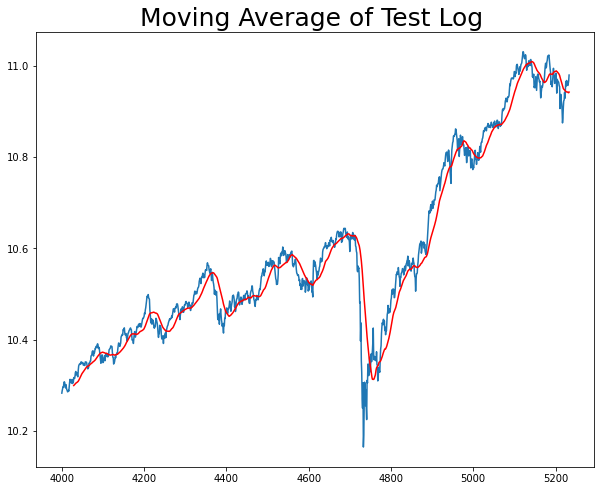

In [27]:
moving_avg_test = bse_test_log.rolling(30).mean()

plt.figure(figsize = (10,8))
plt.title('Moving Average of Test Log ',fontsize = 25)
plt.plot(bse_test_log)
plt.plot(moving_avg_test,color = 'red')

In [28]:
bse_train_log.isnull().sum()

0

In [29]:
bse_test_log.isnull().sum()

0

************* BSE TRAIN LOG DATA **********


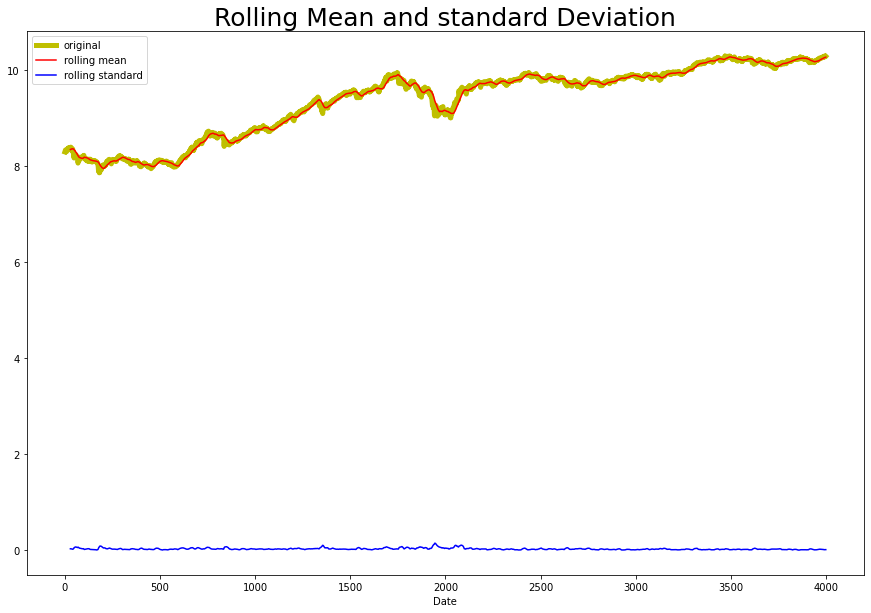

**************Result of Dickey Fuller Test***************
(-0.8391845066632472, 0.8073401494171015, 2, 3997, {'1%': -3.431987103983426, '5%': -2.862263382987423, '10%': -2.56715506449264}, -22250.457282672774)
ADF Test Statistics : -0.8391845066632472
p-value : 0.8073401494171015
#Lags Used : 2
Number of Observation Used : 3997
Critical Value : {'1%': -3.431987103983426, '5%': -2.862263382987423, '10%': -2.56715506449264}
Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary


In [30]:
bse_train_log.dropna(inplace=True)
bse_test_log.dropna(inplace=True)

print('************* BSE TRAIN LOG DATA **********')

test_stationary(bse_train_log)

************* BSE TEST LOG DATA **********


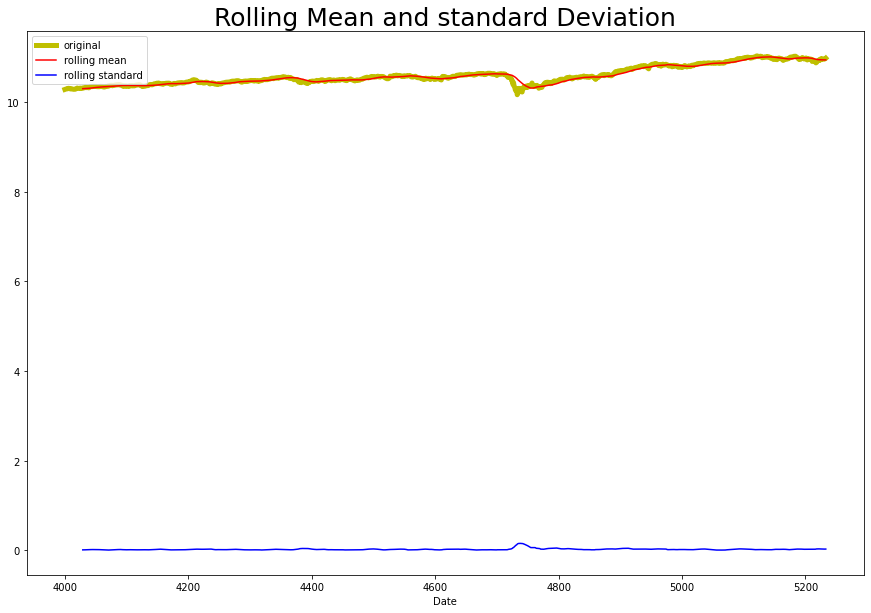

**************Result of Dickey Fuller Test***************
(-0.8269856509449016, 0.811066448975982, 12, 1221, {'1%': -3.435716995109265, '5%': -2.8639100200710828, '10%': -2.568031835031368}, -7276.359564668448)
ADF Test Statistics : -0.8269856509449016
p-value : 0.811066448975982
#Lags Used : 12
Number of Observation Used : 1221
Critical Value : {'1%': -3.435716995109265, '5%': -2.8639100200710828, '10%': -2.568031835031368}
Failed to Reject the Null Hypothesis (HO) Test and Time Series is Non Stationary


In [31]:
print('************* BSE TEST LOG DATA **********')

test_stationary(bse_test_log)

In [32]:
bse_train_log_diff = bse_train_log - moving_avg_train

print(bse_train_log_diff)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3995    0.025454
3996    0.022888
3997    0.011209
3998    0.015680
3999    0.017410
Name: Close, Length: 4000, dtype: float64


In [33]:
bse_train_log_diff.isna().sum()

29

In [34]:
bse_train_log_diff.dropna(inplace=True)

In [35]:
bse_train_log_diff

29      0.033506
30      0.030780
31      0.044829
32      0.018572
33      0.021952
          ...   
3995    0.025454
3996    0.022888
3997    0.011209
3998    0.015680
3999    0.017410
Name: Close, Length: 3971, dtype: float64

In [36]:
print('******************Train Log Difference Data ****************')

test_stationary(bse_train_log_diff)

******************Train Log Difference Data ****************


**************Result of Dickey Fuller Test***************
(-10.85701793815906, 1.4787804621956622e-19, 17, 3953, {'1%': -3.4320053380921984, '5%': -2.8622714378061254, '10%': -2.567159352542258}, -22399.21009410093)
ADF Test Statistics : -10.85701793815906
p-value : 1.4787804621956622e-19
#Lags Used : 17
Number of Observation Used : 3953
Critical Value : {'1%': -3.4320053380921984, '5%': -2.8622714378061254, '10%': -2.567159352542258}
Reject the Null Hypothesis (Ho) test and the Time series is Stationary


In [37]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 66.8 MB/s eta 0:00:00


In [38]:
from pmdarima import auto_arima

In [39]:
bse_model = auto_arima(bse_train_log,trace=True,error_action = 'ignore',supress_warning = True)
bse_model.fit(bse_train_log)

bse_prediction = bse_model.predict(n_periods = len(bse_test))
bse_prediction = pd.DataFrame(bse_prediction,index=bse_test_log.index,columns = ['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-22428.642, Time=1.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-22395.107, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-22419.651, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-22422.749, Time=1.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-22392.527, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-22430.682, Time=1.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-22430.360, Time=1.49 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-22426.624, Time=2.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-22428.724, Time=4.93 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-22430.775, Time=5.34 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-22428.778, Time=4.27 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-22426.809, Time=5.64 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-22428.252, Time=3.89 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 33.342 sec

In [40]:
bse_prediction.head()

Prediction
4000   10.290054
4001   10.290335
4002   10.290794
4003   10.291286
4004   10.291778

Text(0, 0.5, 'Actual Stock Price')

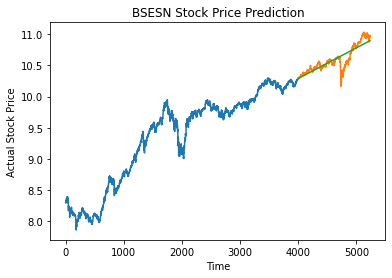

In [41]:

plt.plot(bse_train_log, label='Train')
plt.plot(bse_test_log, label='Test')
plt.plot(bse_prediction, label='Prediction')
plt.title('BSESN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
     

In [42]:
rms = np.sqrt(mean_squared_error(bse_test_log,bse_prediction))
print("RMSE : ", rms)

RMSE :  0.10229140720498592


We are loading the India News Dataset directly from Kaggle site.

Please refer thsi link for more info : https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

In [43]:
#installing kaggle
! pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [44]:
! mkdir ~/.kaggle

In [45]:
! cp /content/sample_data/kaggle.json ~/.kaggle/

In [46]:
! chmod 600 ~/.kaggle/kaggle.json

In [47]:
! kaggle datasets download -d therohk/india-headlines-news-dataset

 93% 81.0M/86.6M [00:01<00:00, 82.1MB/s]
100% 86.6M/86.6M [00:01<00:00, 80.1MB/s]


In [48]:
! unzip india-headlines-news-dataset.zip

Archive:  india-headlines-news-dataset.zip
  inflating: india-news-headlines.csv  


In [49]:
cols = ['Date','Category','News']
india_news_data = pd.read_csv('india-news-headlines.csv', names = cols)
india_news_data.drop(0, inplace=True)
india_news_data.head()

Date Category                                               News
1  20010102  unknown  Status quo will not be disturbed at Ayodhya; s...
2  20010102  unknown                Fissures in Hurriyat over Pak visit
3  20010102  unknown              America's unwanted heading for India?
4  20010102  unknown                 For bigwigs; it is destination Goa
5  20010102  unknown               Extra buses to clear tourist traffic

In [50]:
india_news_data['Date'] = pd.to_datetime(india_news_data['Date'],format = '%Y%m%d')
india_news_data.head()

Date Category                                               News
1 2001-01-02  unknown  Status quo will not be disturbed at Ayodhya; s...
2 2001-01-02  unknown                Fissures in Hurriyat over Pak visit
3 2001-01-02  unknown              America's unwanted heading for India?
4 2001-01-02  unknown                 For bigwigs; it is destination Goa
5 2001-01-02  unknown               Extra buses to clear tourist traffic

In [51]:
pd.set_option('display.max_rows', None)

In [52]:
india_news_data['Category'].astype('category').value_counts()

india                                                         297491
unknown                                                       209583
city.mumbai                                                   150451
city.delhi                                                    137648
business.india-business                                       121195
city.hyderabad                                                119024
city.chandigarh                                               117718
city.bengaluru                                                 98635
city.pune                                                      98633
city.ahmedabad                                                 98269
city.kolkata                                                   93978
entertainment.hindi.bollywood                                  93099
city.lucknow                                                   91764
city.goa                                                       88978
city.nagpur                       

In [53]:
round(((india_news_data['Category'].astype('category').value_counts()/len(india_news_data.index))*100),5) 

india                                                         8.14827
unknown                                                       5.74047
city.mumbai                                                   4.12085
city.delhi                                                    3.77018
business.india-business                                       3.31953
city.hyderabad                                                3.26007
city.chandigarh                                               3.22429
city.bengaluru                                                2.70161
city.pune                                                     2.70156
city.ahmedabad                                                2.69159
city.kolkata                                                  2.57406
entertainment.hindi.bollywood                                 2.54998
city.lucknow                                                  2.51341
city.goa                                                      2.43711
city.nagpur         

In [54]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

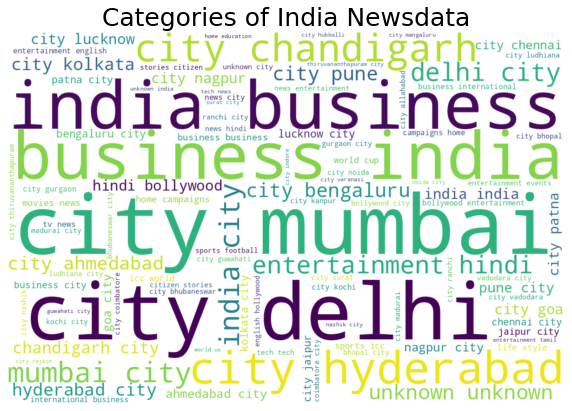

In [55]:
plt.rcParams['figure.figsize'] = (10, 10)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white',
                      colormap='viridis',
                      max_words = 100, 
                      stopwords = stopwords ,
                      width = 1200,
                      height = 800,
                     random_state = 30).generate(str(india_news_data['Category'].astype('category')))


plt.title('Categories of India Newsdata', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

In [56]:
india_news_data.drop('Category',axis  = 1 , inplace = True)
india_news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 1 to 3650970
Data columns (total 2 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   News    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 55.7+ MB


In [57]:
india_news_data.head()

Date                                               News
1 2001-01-02  Status quo will not be disturbed at Ayodhya; s...
2 2001-01-02                Fissures in Hurriyat over Pak visit
3 2001-01-02              America's unwanted heading for India?
4 2001-01-02                 For bigwigs; it is destination Goa
5 2001-01-02               Extra buses to clear tourist traffic

In [58]:
india_news_data.shape

(3650970, 2)

In [59]:
india_news_data['News'] = india_news_data.groupby(['Date']).transform(lambda x : ' '.join(x))

In [60]:
india_news_data = india_news_data.drop_duplicates() 
india_news_data.reset_index(inplace = True, drop = True)
india_news_data.shape

(7717, 2)

In [61]:
india_news_data['News']

0       Status quo will not be disturbed at Ayodhya; s...
1       Powerless north India gropes in the dark Think...
2       The string that pulled Stephen Hawking to Indi...
3       Light combat craft takes India into club class...
4       Light combat craft takes India into club class...
5       Muslim body rules out talks on Ayodhya Bajrang...
6       Sangh Parivar; Babri panel up the ante Frontru...
7       Financier Bharat Shah held for alleged links w...
8       Fend for yourselves; Pande tells doctors Burea...
9       Sonia takes on the Hindutva brigade Congress h...
10      Govt extends J&K ceasefire by a month Peace hi...
11      Big bath passes without a hitch Security bando...
12      President against pitch for indirect polls TRA...
13      Monster quake kills 4;000 Forces to the rescue...
14      Death; distress; destruction...and it's not ov...
15      More tremors forecast for the next 48 hours Th...
16      Hrithik: Miss Indias' delight! Manoj Bajpai: F...
17      Relief

In [63]:
import re

In [67]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [71]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer as ps

In [73]:
# Cleaning Headline

#clean_headline = []
#for i in range(0,len(india_news_data['News'])):
#  news = re.sub('[^a-zA-Z]',' ',india_news_data['News'][i])
#  news = news.lower()
#  news = news.split()
#  news = [ps.stem(word) for word in news if not word in set(stopwords.words('english'))]
#  news = ' '.join(news)
#  clean_headline.append(news)

In [76]:
from textblob import TextBlob

In [77]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [78]:
india_news_data['Subjectivity'] = india_news_data['News'].apply(getSubjectivity)
india_news_data['Polarity'] = india_news_data['News'].apply(getPolarity)
india_news_data

Date                                               News  \
0    2001-01-02  Status quo will not be disturbed at Ayodhya; s...   
1    2001-01-03  Powerless north India gropes in the dark Think...   
2    2001-01-04  The string that pulled Stephen Hawking to Indi...   
3    2001-01-05  Light combat craft takes India into club class...   
4    2001-01-06  Light combat craft takes India into club class...   
5    2001-01-07  Muslim body rules out talks on Ayodhya Bajrang...   
6    2001-01-08  Sangh Parivar; Babri panel up the ante Frontru...   
7    2001-01-09  Financier Bharat Shah held for alleged links w...   
8    2001-01-10  Fend for yourselves; Pande tells doctors Burea...   
9    2001-01-23  Sonia takes on the Hindutva brigade Congress h...   
10   2001-01-24  Govt extends J&K ceasefire by a month Peace hi...   
11   2001-01-25  Big bath passes without a hitch Security bando...   
12   2001-01-26  President against pitch for indirect polls TRA...   
13   2001-01-27  Monster quake kills 4;000 Forces to the rescue...   
14   2001-01-28  Death; distress; destruction...and it's not ov...   
15   2001-01-29  More tremors forecast for the next 48 hours Th...   
16   2001-01-30  Hrithik: Miss Indias' delight! Manoj Bajpai: F...   
17   2001-01-31  Relief operations take back seat in Bhuj Ferna...   
18   2001-02-01  Army cordons off Anjar; says it's a mass grave...   
19   2001-02-02  Gujarat govt yet to get its act together Pak r...   
20   2001-02-03  First the quake; then the flood Vajpayee; Mush...   
21   2001-02-04  Govt to set up national disaster management pa...   
22   2001-02-05  Official toll put at 16;435; Kutch's share 14;...   
23   2001-02-06  PMK withdraws support; but govt safe Economic ...   
24   2001-02-07  Tobacco firms ordered off the field Consumer c...   
25   2001-02-08  Clear debris; start rebuilding: Centre to Guja...   
26   2001-02-09  Copter crash brings VIP sorties under fire CAT...   
27   2001-02-10  A new river runs through Gujarat Is there a se...   
28   2001-02-11  Militants massacre 15 villagers in Rajouri Is ...   
29   2001-02-12  J&K militants step up heat; use ceasefire to r...   
30   2001-02-13  Court gives saffron brigade a breather... ...b...   
31   2001-02-14  Equity dilution; not divestment in Maruti Love...   
32   2001-02-15  Sinha promises industry a breather on taxes Va...   
33   2001-02-16  Govt promises Bill to curb unfair imports 4 ki...   
34   2001-02-17  Two killed in Srinagar firing; curfew clamped ...   
35   2001-02-18  Militancy and ceasefire cannot go together: PM...   
36   2001-02-19  Fresh gunfire in Srinagar as Army regrets earl...   
37   2001-02-21  PM calls all-party meet on ceasefire today Sec...   
38   2001-02-22  Doves have their way; truce prevails Amanullah...   
39   2001-02-23  Truce to be tried out for 3 more months Enough...   
40   2001-02-24  Survey signals bold steps in Budget Govt may b...   
41   2001-02-25  Pink slips herald nightmare for Indian nerds i...   
42   2001-02-26  Civilian deaths swelling J&K militant ranks So...   
43   2001-02-27  Mamata chugs along beaten track; spares passen...   
44   2001-02-28  A common man's Budget Taliban decree may punch...   
45   2001-03-01  Savvy Sinha cuts a new deal Markets cheer refo...   
46   2001-03-02                                Such A Long Journey   
47   2001-03-05                                  The Buddha Smiles   
48   2001-03-09  Maneka asks govt to take back land for cow she...   
49   2001-03-11  TDP men hack 7 Congress workers to death Azhar...   
50   2001-03-13                                Expose rocks nation   
51   2001-03-14  Fernandes offers to quit 'It's all in national...   
52   2001-03-15  PM sticks to guns; allies unhappy Fernandes st...   
53   2001-03-16                                      Tape and Tell   
54   2001-03-17                     Crouching Tiger; Hidden Dragon   
55   2001-03-18  Congress ready for coalition BJP begins to reh...   
56   2001-03-19  Soni

<AxesSubplot:>

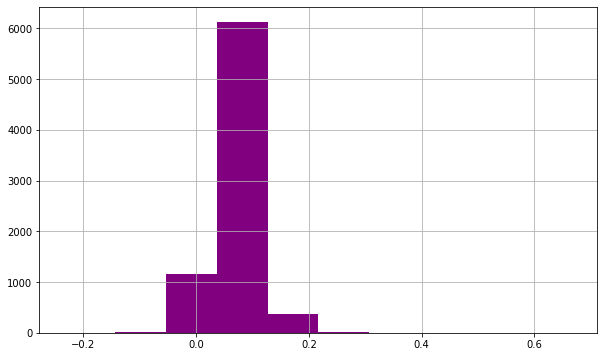

In [79]:
plt.figure(figsize = (10,6))
india_news_data['Polarity'].hist(color = 'purple')

<AxesSubplot:>

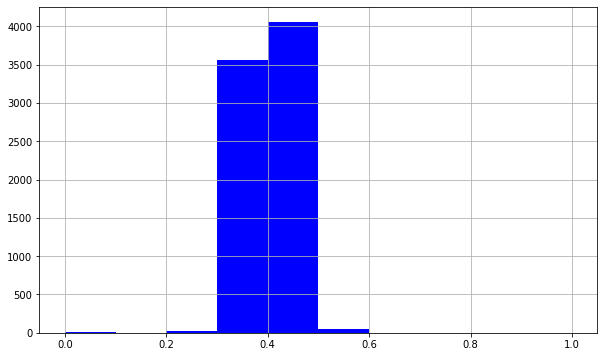

In [80]:

plt.figure(figsize = (10,6))
india_news_data['Subjectivity'].hist(color = 'blue')